# Underfit_Overfit_using_KNN

In [2]:
%cd '/content/drive/MyDrive/Machine Learning/8. Selecting the right model'

/content/drive/MyDrive/Machine Learning/8. Selecting the right model


In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv('data_cleaned.csv')

In [5]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [6]:
data.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [7]:
#seperating independent and dependent variables

x = data.drop(['Survived'], axis=1)
y = data['Survived']

In [8]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

In [9]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 96, stratify=y)

In [10]:
#importing KNN classifier and metric F1score

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [11]:
# Creating instance of KNN
clf = KNN(n_neighbors = 3)

# Fitting the model
clf.fit(train_x, train_y)

# Predicting over the Train Set and calculating F1
train_predict = clf.predict(train_x)
k = f1_score(train_predict, train_y)
print('Training F1 Score', k )

# Predicting over the Train Set and calculating F1
test_predict = clf.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test F1 Score    ', k )

Training F1 Score 0.8209255533199196
Test F1 Score     0.7080745341614907


In [12]:
def F1score(K):
    '''
  Takes an input K consisting of a range of K values for KNN
  Input:
  K = list
  
  Returns: lists containing F1 corresponding to every value of K
  train_f1 = list of train f1 score corresponding K
  test_f1  = list of test f1 score corresponding to K
    '''
      # initiating empty list
    train_f1 = []
    test_f1 = []
  
      # training model for evey value of K
    for i in K:
        # Instance oh KNN
        clf  = KNN(n_neighbors = i)
        clf.fit(train_x, train_y)
        # Appending F1 scores to empty list claculated using the predictions
        tmp = clf.predict(train_x)
        tmp = f1_score(tmp,train_y)
        train_f1.append(tmp)
    
        tmp = clf.predict(test_x)
        tmp = f1_score(tmp,test_y)
        test_f1.append(tmp)
    
    return train_f1, test_f1

In [13]:
#Defining K range
k = range(1,150)

In [14]:
# calling above defined function
train_f1, test_f1 = F1score(k)

In [15]:
score = pd.DataFrame({'train score': train_f1, 'test score': test_f1}, index = k)
score

,train score,test score
1,0.982524,0.701149
2,0.804651,0.585714
3,0.820926,0.708075
4,0.771300,0.628571
5,0.774327,0.675497
...,...,...
145,0.552632,0.517241
146,0.552632,0.517241
147,0.552632,0.517241
148,0.552632,0.517241


In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6

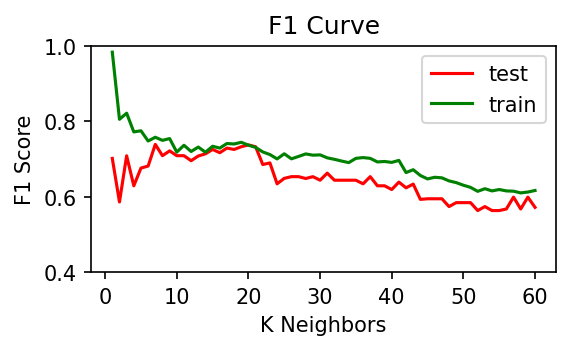

In [17]:
# plotting the Curvesg
plt.figure(figsize=(4,2), dpi=150)
plt.plot(k[0:60], test_f1[0:60], color = 'red' , label = 'test')
plt.plot(k[0:60], train_f1[0:60], color = 'green', label = 'train')
plt.xlabel('K Neighbors')
plt.ylabel('F1 Score')
plt.title('F1 Curve')
plt.ylim(0.4,1)
plt.legend()

# Hold_out Validation

In [20]:
data = pd.read_csv('data_cleaned.csv')

In [21]:
# For train set
data_x = data.drop(['Survived'], axis=1)
data_y = data['Survived']

In [22]:
from sklearn.model_selection import train_test_split as tts
train1_x, test_x , train1_y, test_y = tts( data_x, data_y , test_size = 0.2 , random_state = 50, stratify = data_y)

In [23]:
train_x, val_x, train_y, val_y = tts(train1_x, train1_y, test_size = 0.2 , random_state = 51, stratify = train1_y)

print('training data    ',train_x.shape,train_y.shape)
print('validation data  ',val_x.shape,val_y.shape)
print('test data        ',test_x.shape,test_y.shape)

training data     (569, 24) (569,)
validation data   (143, 24) (143,)
test data         (179, 24) (179,)


In [24]:
train_y.value_counts()/len(train_y)

0    0.616872
1    0.383128
Name: Survived, dtype: float64

In [25]:
val_y.value_counts()/len(val_y)

0    0.615385
1    0.384615
Name: Survived, dtype: float64

In [26]:
test_y.value_counts()/len(test_y)

0    0.614525
1    0.385475
Name: Survived, dtype: float64

# Cross_Validation

In [27]:
data = pd.read_csv('data_cleaned.csv')

In [28]:
#separating independent and dependent variables

x = data.drop(['Survived'], axis=1)
y = data['Survived']

In [29]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

In [30]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x, y, random_state = 96, stratify=y)

In [31]:
#importing KNN classifier and metric F1score

from sklearn.neighbors import KNeighborsClassifier as KNN

In [32]:
from sklearn.model_selection import cross_val_score
score = cross_val_score( KNN(n_neighbors = 3), X = train_x, y = train_y, cv = 10)
score

array([0.76119403, 0.74626866, 0.76119403, 0.7761194 , 0.65671642,
       0.80597015, 0.8358209 , 0.80597015, 0.81818182, 0.74242424])

In [33]:
# Consistency using Mean and standard deviation in percentage
score.mean()*100, score.std()*100

(77.09859791949344, 4.856044270804294)

In [34]:
def Val_score(n_neighbors):
    '''
  takes range of n_neighbors as input
  returns Mean and Standard Deviation for each value of n_neighbors
  '''
    avg = []
    std = []
  
    for i in n_neighbors:
    
    # 10 fold cross validation for every value of n_neighbor
      score = cross_val_score( KNN(n_neighbors = i) , X = train_x, y = train_y, cv = 10)
    
    # adding mean to avg list
      avg.append(score.mean())
    
    # adding standard deviation to std list
      std.append(score.std())
    
    return avg, std

In [35]:
n_neighbors = range(1,50)
mean, std = Val_score(n_neighbors)

Text(0.5, 1.0, 'Mean Validation score')

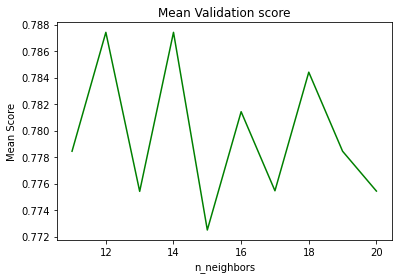

In [36]:
plt.plot(n_neighbors[10:20], mean[10:20], color = 'green', label = 'mean' )
plt.xlabel('n_neighbors')
plt.ylabel('Mean Score')
plt.title('Mean Validation score')

Text(0.5, 1.0, 'Standard Deviation of Validation score')

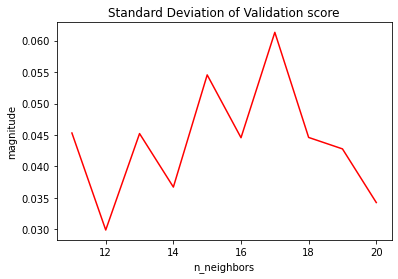

In [37]:
plt.plot(n_neighbors[10:20], std[10:20], color = 'red', label = 'Standard deviation' )
plt.xlabel('n_neighbors')
plt.ylabel('magnitude')
plt.title('Standard Deviation of Validation score')

In [38]:
clf = KNN(n_neighbors = 14 )
clf.fit(train_x, train_y)

score1 = clf.score(train_x, train_y)

score = clf.score(test_x, test_y)
score, score1

(0.8161434977578476, 0.811377245508982)